In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


In [60]:
df = pd.read_csv('TotalPopulation.csv', na_values='?')

In [61]:
df

,index,indic_code,urau_code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,DE1001V,AT,7795786.0,7867796.0,7962003.0,8015027.0,8039865.0,8054802.0,8067812.0,...,NaN,8451860.0,8507786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,DE1001V,AT001C,1539848.0,NaN,NaN,NaN,NaN,1595402.0,1609631.0,...,NaN,1741246.0,1766746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,DE1001V,AT002C,237810.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,265778.0,269997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DE1001V,AT003C,203044.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,191501.0,193814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,DE1001V,AT004C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,145871.0,146631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,904,DE1001V,UK131C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,66144.0,67521.0,68918.0,70184.0,NaN,NaN,NaN
905,905,DE1001V,UK132C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,97298.0,98326.0,99600.0,100759.0,NaN,NaN,NaN
906,906,DE1001V,UK133C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79330.0,78960.0,78455.0,NaN,NaN,NaN
907,907,DE1001V,UK134C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,175245.0,176380.0,177310.0,NaN,NaN,NaN


In [63]:
# summarize the number of rows with missing values for each column
for i in range(df.shape[1]):
 # count number of rows with missing values
 n_miss = df[[i]].isnull().sum()
 perc = n_miss / df.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

In [53]:
df.head()

,3,4,5,6,7,8,9,10,11,12,...,24,25,26,27,28,29,30,31,32,33
0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,7795786.0,7867796.0,7962003.0,8015027.0,8039865.0,8054802.0,8067812.0,8075425.0,7992323.0,8011566.0,...,NaN,8451860.0,8507786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1539848.0,NaN,NaN,NaN,NaN,1595402.0,1609631.0,1606843.0,1608144.0,1615438.0,...,NaN,1741246.0,1766746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,237810.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,265778.0,269997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,203044.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,191501.0,193814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data = df.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 13]

In [55]:
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [56]:
X

array([[1.991000e+03, 1.992000e+03, 1.993000e+03, ..., 2.019000e+03,
        2.020000e+03, 2.021000e+03],
       [7.795786e+06, 7.867796e+06, 7.962003e+06, ...,          nan,
                 nan,          nan],
       [1.539848e+06,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [57]:
import numpy
# print total missing
print('Missing: %d' % sum(numpy.isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(numpy.isnan(Xtrans).flatten()))

Missing: 13494
Missing: 0


ValueError: x and y must have same first dimension, but have shapes (31,) and (910, 30)

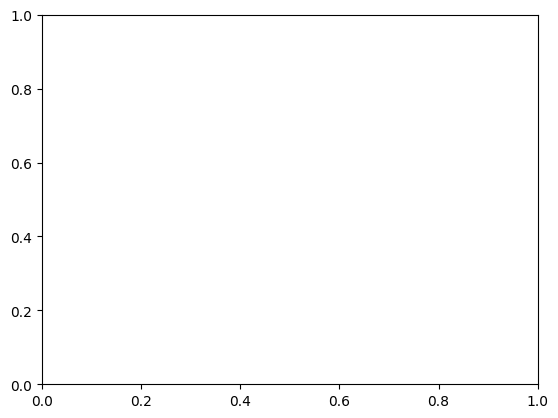

In [58]:
x = range(1991, 2022)

plt.plot(x, Xtrans)

In [64]:
df2 = pd.read_csv('CompleteData.csv', na_values='?')

In [65]:
df2.head()

,index,indic_code,urau_code,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,7,DE1001V,BE,9986975.0,10021997.0,10068319.0,10100631.0,10130574.0,10143047.0,10170226.0,...,11094850.0,11161642.0,11203992.0,11258434.0,11307192.0,11351727.0,11398589.0,11455519.0,11522440.0,11554767.0
1,8,DE1001V,BE001C,954045.0,951217.0,950339.0,949070.0,951580.0,948122.0,950597.0,...,1159448.0,1174624.0,1183841.0,1196831.0,1201129.0,1199095.0,1205492.0,1215289.0,1223364.0,1226329.0
2,9,DE1001V,BE002C,467518.0,465783.0,465102.0,462880.0,459072.0,455852.0,453030.0,...,507368.0,512230.0,513915.0,515593.0,517731.0,520859.0,523591.0,526439.0,530014.0,530627.0
3,10,DE1001V,BE003C,230246.0,230232.0,229821.0,228490.0,227483.0,226464.0,225469.0,...,249205.0,249754.0,251984.0,253914.0,257226.0,259462.0,260329.0,262205.0,263687.0,264019.0
4,11,DE1001V,BE004C,206214.0,206903.0,207045.0,206898.0,206491.0,205591.0,204899.0,...,204762.0,204826.0,203640.0,203228.0,202602.0,201884.0,202341.0,202637.0,203314.0,238412.0


In [66]:
dataFrame = 

1734